## imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from collections import defaultdict
import itertools

import sklearn
import sys,os
sys.path.append(os.path.abspath("/mnt/home/yjo10/ceph/CAMELS/MIEST/utils/"))
from imp import reload 
# Change in mymodule/'
import vib_utils
reload(vib_utils)
from vib_utils import *
import mist_utils
reload(mist_utils)
from mist_utils import *
import umap_utils
reload(umap_utils)
from umap_utils import *

import torch
import gc

import warnings
warnings.filterwarnings('ignore')

# Device Config
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

sys.path.append(os.path.abspath("/mnt/home/yjo10/ceph/myutils/"))
import plt_utils as pu
from plt_utils import generateAxesForMultiplePlots, remove_inner_axes
# Dimension reduction and clustering libraries
import umap
import umap.plot
#import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestRegressor
from sklearn import manifold
from plt_utils import generateAxesForMultiplePlots
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.rcParams['font.family']='serif'
from sklearn.decomposition import KernelPCA

# Many realizations

## One sim

### data preparation

In [ ]:
sims = ['TNG', 'SIMBA', 'ASTRID', 'EAGLE']; field='HI'
fpath = '/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck'

externals = [[tmp2 for tmp2 in sims if tmp is not tmp2] for tmp in sims]
data = []
ext  = []
#for i, sim in enumerate(sims):

sim = 'TNG'; i = 0;

study_name = f"{sim}_HI_cnn_zero_monopole_1_new_split"
storage    = f"sqlite:////mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/{study_name}.db"
path       = f"/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/{study_name}.db"
print(path, sim)


for i, sim in enumerate(sims[1:]):
    rel_err     = []
    crs_rel_err = []
    for num_trial in range(1000):
        path_trial = f"/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/model/optuna/{sim}_HI_cnn_zero_monopole_1_new_split_{num_trial}_vib.pt"
        if os.path.isfile(path) and os.path.isfile(path_trial):
            print("file exists!")
            mist = MIST(sim=[sim], field=field, batch_size=32, 
                        data_type = 'image',
                        normalization=True,
                        monopole = True,
                        device=device, robust_axis='sim')
            try:
                mist.load_optuna_models(storage=storage,study_name=study_name, which_machine="vib_cnn",num_trial=num_trial, fpath=fpath)
                #mse_om, mse_sig, _,_,_ = mist.get_score_cnn()
                data = mist.make_plots_cnn(fname='cnn_test', save_plot=False, data_return=True,show_plot=False)
                y_true   = data[0][0][:,0]
                y_mean   = data[1][0][:,0]
                y_std    = data[2][0][:,0]
                y_res_om_0 = np.mean(np.abs((y_mean-y_true)/y_true))*100
                y_true   = data[0][0][:,1]
                y_mean   = data[1][0][:,1]
                y_std    = data[2][0][:,1]
                y_res_sg_0 = np.mean(np.abs((y_mean-y_true)/y_true))*100
    
                print(y_res_om)
                if y_res_om > 10:
                    print(y_res_om)
                    continue
                    
                tmp = list()
                for sim_ext in externals[i]:
                    data = mist.test_on_cnn(sim_ext, show_score=True, data_return=True,show_plot=False)
                    y_true = data[0][:,0]
                    y_mean = data[1][0][:,0]
                    y_std  = data[1][1][:,0]
                    y_res_om = np.mean(np.abs((y_mean-y_true)/y_true))*100
                    print(y_res_om)
    
                    y_true = data[0][:,1]
                    y_mean = data[1][0][:,1]
                    y_std  = data[1][1][:,1]
                    y_res_sg = np.mean(np.abs((y_mean-y_true)/y_true))*100
                    
                    tmp.append([num_trial, y_res_om, y_res_sg])
                crs_rel_err.append(tmp)
                rel_err.append([num_trial, y_res_om_0, y_res_sg_0])
            except:
                continue
    np.save(f"rel_err_{sim}", rel_err)
    np.save(f"crs_rel_err_{sim}", crs_rel_err)



/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/TNG_HI_cnn_zero_monopole_1_new_split.db TNG
file exists!
file exists!
file exists!
file exists!
file exists!
num_trial=4, params={'dropout': 0.009299126986091595, 'hidden': 8, 'lr': 6.056139119707281e-06, 'wd': 0.0012321207975960092, 'z_dim': 430} 
file exists!
num_trial=5, params={'dropout': 0.24998350616178436, 'hidden': 7, 'lr': 0.0016981070187158825, 'wd': 5.093266625213401e-08, 'z_dim': 63} 
file exists!
num_trial=6, params={'dropout': 0.08835311707573336, 'hidden': 8, 'lr': 2.76372749685535e-06, 'wd': 1.8790519557534366e-05, 'z_dim': 1645} 
file exists!
num_trial=7, params={'dropout': 0.17940806174716623, 'hidden': 8, 'lr': 1.3207626260563813e-06, 'wd': 8.035483056746344e-06, 'z_dim': 1701} 
file exists!
num_trial=8, params={'dropout': 0.39031722892469295, 'hidden': 7, 'lr': 4.474770004030887e-05, 'wd': 1.0819839670713472e-07, 'z_dim': 368} 
file exists!
num_trial=9, params={'dropout': 0.20647319137616973, 'hidden'

In [4]:
print("Done!")

Done!


### plot

In [36]:
sim = 'TNG'
rel_err     = np.load(f"rel_err_{sim}.npy")
crs_rel_err = np.load(f"crs_rel_err_{sim}.npy")

In [37]:
crs_rel_err.shape

(0,)

In [3]:
plt.scatter(rel_err[:,0], rel_err[:,1])

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [19]:
rel_err.shape, crs_rel_err.shape

((333, 3), (276, 3, 2))

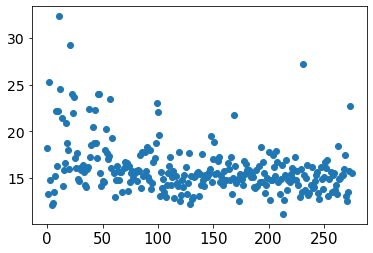

In [21]:
plt.scatter(range(crs_rel_err[:,i,1].shape[0]), crs_rel_err[:,i,1])

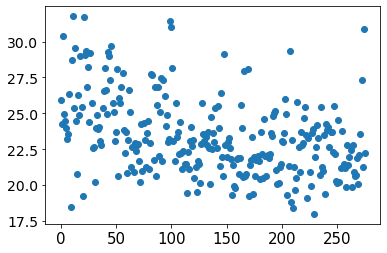

In [24]:
i=0
plt.scatter(range(crs_rel_err[:,i,1].shape[0]), crs_rel_err[:,i,0])

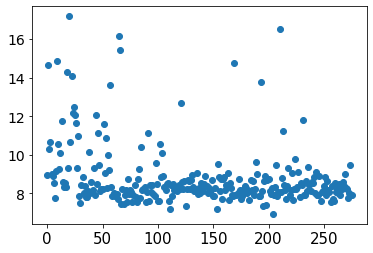

In [25]:
i=1
plt.scatter(range(crs_rel_err[:,i,1].shape[0]), crs_rel_err[:,i,0])

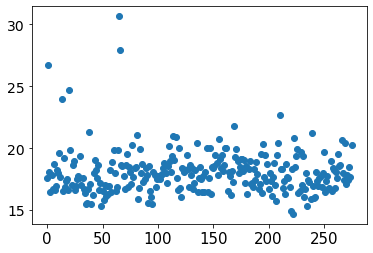

In [26]:
i=2
plt.scatter(range(crs_rel_err[:,i,1].shape[0]), crs_rel_err[:,i,0])

In [ ]:
    np.save(f"rel_err_{sim}", rel_err)
    np.save(f"crs_rel_err_{sim}", crs_rel_err)

## Two sims

### Data preparation

In [2]:
import torch
import gc

In [6]:
sims = ['TNG', 'SIMBA', 'ASTRID', 'EAGLE']; field='HI'
study_names = ["HI_cnn_enc_dec_zero_monopole_1","HI_cnn_zero_monopole_1_new","HI_cnn_zero_monopole_1_new_split"]
fpath = '/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck'


combinations = list(itertools.combinations(sims, 2))
externals = [[x for x in sims if x not in comb] for comb in combinations]
data   = list()
params = list()
label  = list()

for i, comb in enumerate(combinations):
    auc = []
    for fname in study_names:
        study_name = f"{comb[0]}_{comb[1]}_" + fname
        storage    = f"sqlite:////mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/{study_name}.db"
        path       = f"/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/{study_name}.db"
        print(path, comb)
        if os.path.isfile(path):  
            for num_trial in range(1000):
                path_trial = f"/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/model/optuna/{sim}_{study_name}_{num_trial}_vib.pt"
                if os.path.isfile(path_trial): 
                    print("file exists!")
                    try:
                        vib_umap = UMAP(sim=list(comb),field=field,study_name=study_name, fpath=fpath)#, ext_sim='ASTRID')
                        auc.append([num_trial, vib_umap.auc])
                    except:
                        continue
                    torch.cuda.empty_cache()
                    gc.collect()
    np.save(f"auc_{comb[0]}_{comb[1]}", auc)

/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/TNG_SIMBA_HI_cnn_enc_dec_zero_monopole_1.db ('TNG', 'SIMBA')
/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/TNG_SIMBA_HI_cnn_zero_monopole_1_new.db ('TNG', 'SIMBA')
/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/TNG_SIMBA_HI_cnn_zero_monopole_1_new_split.db ('TNG', 'SIMBA')
/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/TNG_ASTRID_HI_cnn_enc_dec_zero_monopole_1.db ('TNG', 'ASTRID')
/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/TNG_ASTRID_HI_cnn_zero_monopole_1_new.db ('TNG', 'ASTRID')
/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/TNG_ASTRID_HI_cnn_zero_monopole_1_new_split.db ('TNG', 'ASTRID')
/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/TNG_EAGLE_HI_cnn_enc_dec_zero_monopole_1.db ('TNG', 'EAGLE')
/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/TNG_EAGLE_HI_cnn_zero_monopole_1_new.db ('T

KeyboardInterrupt: 

In [125]:
!nvidia-smi

Sun Sep 15 15:29:21 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla V100-SXM2-32GB           Off |   00000000:18:00.0 Off |                    0 |
| N/A   38C    P0            106W /  300W |    2786MiB /  32768MiB |     61%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
# To select the GPU with ID 0
torch.cuda.set_device(1)

# Check if the selected GPU is being used
print("Current device:", torch.cuda.current_device())
print("GPU in use:", torch.cuda.get_device_name(torch.cuda.current_device()))
device = torch.device("cuda:1")

Current device: 1
GPU in use: Tesla V100-SXM2-32GB


In [ ]:
a

In [4]:
fpath = '/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck'
sims  = ['TNG', 'SIMBA']; field = 'HI'
#study_name = f"{sims[0]}_{sims[1]}_{field}_cnn_enc_dec_mid_monopole_1"
study_name = f"TNG_SIMBA_HI_cnn_mid_monopole_1_new_split"

auc = []
storage    = f"sqlite:////mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/{study_name}.db"
path       = f"/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/{study_name}.db"
if os.path.isfile(path):
    print(path, sims)
    mist = MIST(sim=sims, field=field, batch_size=32, data_type = 'image',
                normalization=True, monopole = True, device=device)
    for num_trial in range(1000):
        torch.cuda.empty_cache()
        gc.collect()
        path_trial = f"/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/model/optuna/{study_name}_{num_trial}_vib.pt"
        if os.path.isfile(path_trial): 
            print("file exists!")
            try:
                mist.load_optuna_models(storage=storage,study_name=study_name, which_machine="cnn_enc_dec",num_trial=num_trial, fpath=fpath)
                data = mist.make_plots_cnn(fname='cnn_test', save_plot=False, data_return=True,show_plot=False)

                y_true   = data[0][0][:,0]
                y_mean   = data[1][0][:,0]
                y_std    = data[2][0][:,0]
                y_res_om_0 = np.mean(np.abs((y_mean-y_true)/y_true))*100
                b_om_0     = np.abs(np.mean((y_mean-y_true)/y_true)) ## bias
                std_om_0   = np.mean(y_std)
                y_true   = data[0][0][:,1]
                y_mean   = data[1][0][:,1]
                y_std    = data[2][0][:,1]
                y_res_sg_0 = np.mean(np.abs((y_mean-y_true)/y_true))*100
                b_sg_0     = np.abs(np.mean((y_mean-y_true)/y_true)) ## bias
                std_sg_0   = np.mean(y_std)

                print(y_res_om_0, y_res_sg_0)
                if y_res_om_0 > 6 or y_res_sg_0 > 6:
                    print("Skip!")
                    continue
                                            
                _, __auc, _, _, _ = do_classification(mist)
                print(f"The AUC score is {__auc}.")

                tmp = list()
                for sim_ext in ['ASTRID', 'EAGLE']:
                    data = mist.test_on_cnn(sim_ext, show_score=True, data_return=True,show_plot=False)
                    y_true = data[0][:,0]
                    y_mean = data[1][0][:,0]
                    y_std  = data[1][1][:,0]
                    y_res_om = np.mean(np.abs((y_mean-y_true)/y_true))*100
                    b_om     = np.abs(np.mean((y_mean-y_true)/y_true)) ## bias
                    std_om   = np.mean(y_std)
                    print(y_res_om)
    
                    y_true = data[0][:,1]
                    y_mean = data[1][0][:,1]
                    y_std  = data[1][1][:,1]
                    y_res_sg = np.mean(np.abs((y_mean-y_true)/y_true))*100
                    b_sg     = np.abs(np.mean((y_mean-y_true)/y_true)) ## bias
                    std_sg   = np.mean(y_std)
                    
                    tmp.extend([y_res_om, b_om, std_om, y_res_sg, b_sg, std_sg])
            
                auc.append([num_trial, __auc, 
                            y_res_om_0, b_om_0, std_om_0, y_res_sg_0, b_sg_0, std_sg_0,
                            tmp[0], tmp[1], tmp[2], tmp[3],tmp[4],
                            tmp[5], tmp[6], tmp[7],tmp[8], tmp[9], tmp[10], tmp[11]])
                print(auc[-1])
            except:
                continue
np.save(f"auc_{sims[0]}_{sims[1]}_mid_2", auc)

/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/TNG_SIMBA_HI_cnn_mid_monopole_1_new_split.db ['TNG', 'SIMBA']
file exists!
nan nan
file exists!
17.723356984911508 13.066694235308884
Skip!
file exists!
6.437371126231128 6.908827836988363
Skip!
file exists!
14.525920517116742 12.409797630146603
Skip!
file exists!
7.296016882897869 13.128096891572003
Skip!
file exists!
7.22019343489685 13.188154753060664
Skip!
file exists!
19.540218830319475 16.43382968869934
Skip!
file exists!
10.149307991184454 10.72569948608072
Skip!
file exists!
26.891726981564464 19.46214270653915
Skip!
file exists!
14.612614605276587 12.477760526858372
Skip!
file exists!
11.932210144876633 9.014271041462008
Skip!
file exists!
8.601188072648872 7.418219094145792
Skip!
file exists!
nan nan
file exists!
5.256569775263151 13.154900297550338
Skip!
file exists!
9.75530699751492 10.016824003472912
Skip!
file exists!
8.739052356755677 13.141378036129868
Skip!
file exists!
6.747811727903932 8.33399871031987

In [3]:
fpath = '/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck'
sims  = ['TNG', 'SIMBA']; field = 'HI'
#study_name = f"{sims[0]}_{sims[1]}_{field}_cnn_enc_dec_mid_monopole_1"
study_name = f"TNG_SIMBA_HI_cnn_zero_monopole_1_new_split"

auc = []
storage    = f"sqlite:////mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/{study_name}.db"
path       = f"/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/{study_name}.db"
if os.path.isfile(path):
    print(path, sims)
    mist = MIST(sim=sims, field=field, batch_size=32, data_type = 'image',
                normalization=True, monopole = True, device=device)
    for num_trial in range(1000):
        torch.cuda.empty_cache()
        gc.collect()
        path_trial = f"/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/model/optuna/{study_name}_{num_trial}_vib.pt"
        if os.path.isfile(path_trial): 
            print("file exists!")
            try:
                mist.load_optuna_models(storage=storage,study_name=study_name, which_machine="cnn_enc_dec",num_trial=num_trial, fpath=fpath)
                data = mist.make_plots_cnn(fname='cnn_test', save_plot=False, data_return=True,show_plot=False)

                y_true   = data[0][0][:,0]
                y_mean   = data[1][0][:,0]
                y_std    = data[2][0][:,0]
                y_res_om_0 = np.mean(np.abs((y_mean-y_true)/y_true))*100
                b_om_0     = np.abs(np.mean((y_mean-y_true)/y_true)) ## bias
                std_om_0   = np.mean(y_std)
                y_true   = data[0][0][:,1]
                y_mean   = data[1][0][:,1]
                y_std    = data[2][0][:,1]
                y_res_sg_0 = np.mean(np.abs((y_mean-y_true)/y_true))*100
                b_sg_0     = np.abs(np.mean((y_mean-y_true)/y_true)) ## bias
                std_sg_0   = np.mean(y_std)

                print(y_res_om_0, y_res_sg_0)
                if y_res_om_0 > 6 or y_res_sg_0 > 6:
                    print("Skip!")
                    continue
                                            
                _, __auc, _, _, _ = do_classification(mist)
                print(f"The AUC score is {__auc}.")

                tmp = list()
                for sim_ext in ['ASTRID', 'EAGLE']:
                    data = mist.test_on_cnn(sim_ext, show_score=True, data_return=True,show_plot=False)
                    y_true = data[0][:,0]
                    y_mean = data[1][0][:,0]
                    y_std  = data[1][1][:,0]
                    y_res_om = np.mean(np.abs((y_mean-y_true)/y_true))*100
                    b_om     = np.abs(np.mean((y_mean-y_true)/y_true)) ## bias
                    std_om   = np.mean(y_std)
                    print(y_res_om)
    
                    y_true = data[0][:,1]
                    y_mean = data[1][0][:,1]
                    y_std  = data[1][1][:,1]
                    y_res_sg = np.mean(np.abs((y_mean-y_true)/y_true))*100
                    b_sg     = np.abs(np.mean((y_mean-y_true)/y_true)) ## bias
                    std_sg   = np.mean(y_std)
                    
                    tmp.extend([y_res_om, b_om, std_om, y_res_sg, b_sg, std_sg])
            
                auc.append([num_trial, __auc, 
                            y_res_om_0, b_om_0, std_om_0, y_res_sg_0, b_sg_0, std_sg_0,
                            tmp[0], tmp[1], tmp[2], tmp[3],tmp[4],
                            tmp[5], tmp[6], tmp[7],tmp[8], tmp[9], tmp[10], tmp[11]])
                print(auc[-1])
            except:
                continue
np.save(f"auc_{sims[0]}_{sims[1]}_zero_2", auc)

/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/TNG_SIMBA_HI_cnn_zero_monopole_1_new_split.db ['TNG', 'SIMBA']
file exists!
nan nan
file exists!
nan nan
file exists!
15.760498035667862 11.84368038793596
Skip!
file exists!
12.451261405283255 12.439534185126183
Skip!
file exists!
17.82396186436015 17.439278380082644
Skip!
file exists!
14.680728122396166 12.809173463442027
Skip!
file exists!
10.767648373737265 11.061151359711715
Skip!
file exists!
nan nan
file exists!
11.788512426962194 11.621125922040743
Skip!
file exists!
12.555856806583002 11.765275805118687
Skip!
file exists!
12.319350437858018 11.67162742457898
Skip!
file exists!
3.6648519113238556 4.335450043628189
The AUC score is 0.9162966296629662.
(15000, 1, 256, 256) (15000, 2)
$\Omega_m$: MSE=0.004, % error=19.021%, R2 score=0.682,chi2=8.936, bias=-0.054
$\sigma_8$: MSE=0.013, % error=12.669%, R2 score=-0.007,chi2=10.110, bias=-0.066
19.02168592257675
(15000, 1, 256, 256) (15000, 2)
$\Omega_m$: MSE=0.005, % e

### plot

In [33]:
auc     = np.load(f"auc_TNG_SIMBA.npy")
auc.shape

(213, 4)

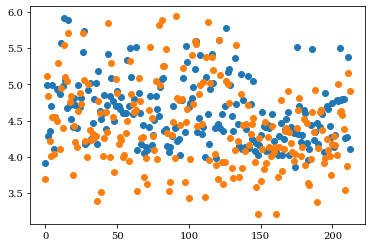

In [17]:
plt.scatter(range(auc.shape[0]), auc[:,2])
plt.scatter(range(auc.shape[0]), auc[:,1])

In [34]:
mean_rel = (auc[:,2]+auc[:,1])/2

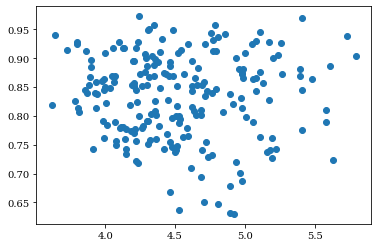

In [35]:
plt.scatter(mean_rel, auc[:,3])

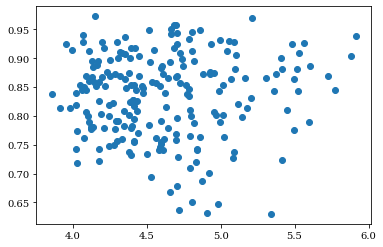

In [25]:
plt.scatter(auc[:,2], auc[:,3])

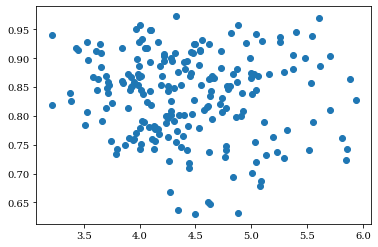

In [24]:
plt.scatter(auc[:,1], auc[:,3])

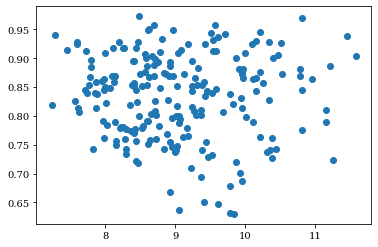

In [27]:
mean_rel = (auc[:,2]+auc[:,1])/2
plt.scatter(sum_rel, auc[:,3])

In [30]:
auc     = np.load(f"auc_TNG_ASTRID.npy")
auc.shape

(165, 4)

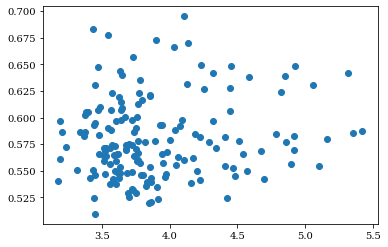

In [31]:
mean_rel = (auc[:,2]+auc[:,1])/2
plt.scatter(mean_rel, auc[:,3])

In [52]:
?pu.remove_inner_axes

Signature: pu.remove_inner_axes(axes, size)
Docstring: <no docstring>
File:      ~/ceph/myutils/plt_utils.py
Type:      function


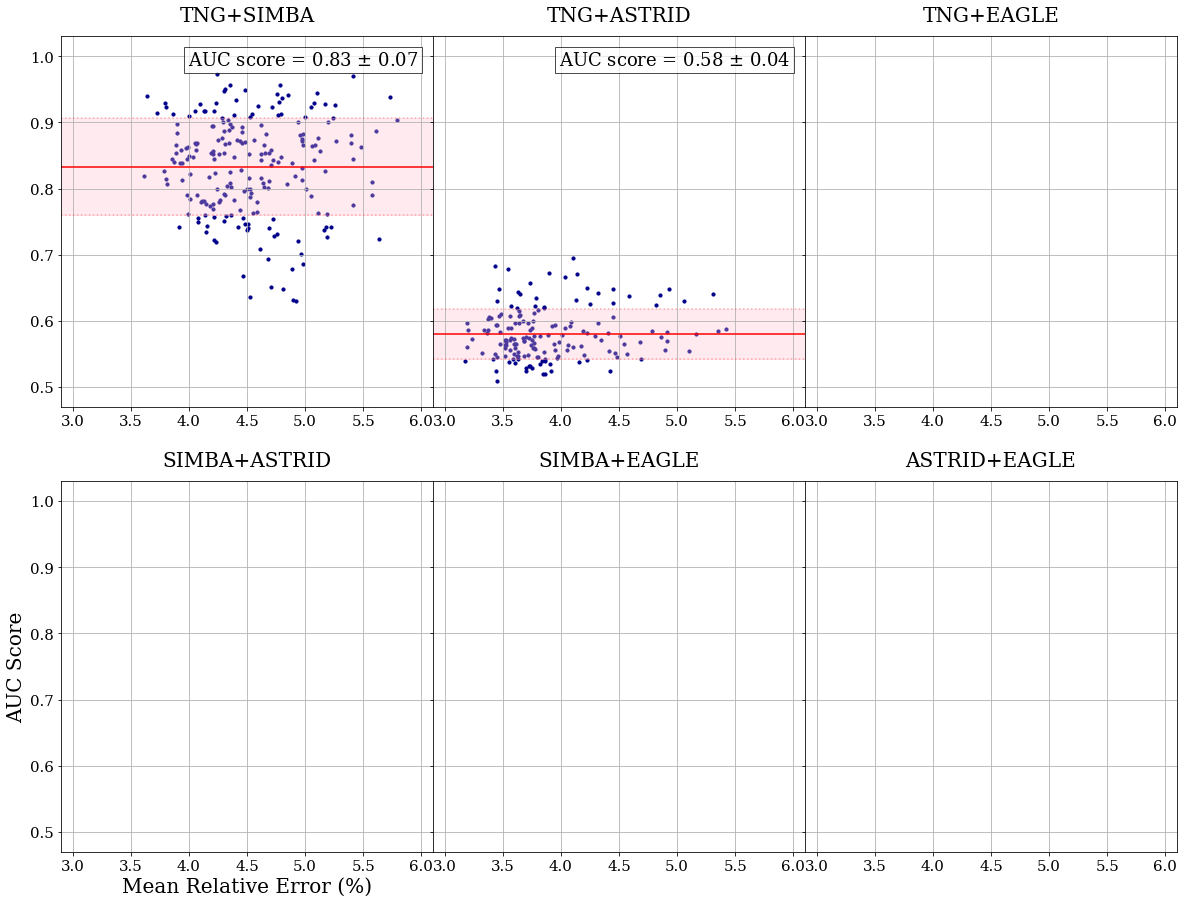

In [123]:
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['font.family']='serif'
X, Y = 3,2
fig, axes = pu.generateAxesForMultiplePlots(shape=(X,Y),figsize=(20,15),
                                      hspace=0.20,wspace=0.00)
#pu.remove_inner_axes(axes,size=[X,Y])

for i in range(X):
    for j in range(Y):
        #if j != 1:
            #axes[i,j].set_xticklabels([])
        if i != 0:
            axes[i,j].set_yticklabels([])

sims = ['TNG', 'SIMBA', 'ASTRID', 'EAGLE']; field='HI'
study_names = ["HI_cnn_enc_dec_zero_monopole_1","HI_cnn_zero_monopole_1_new","HI_cnn_zero_monopole_1_new_split"]
fpath = '/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck'


combinations = list(itertools.combinations(sims, 2))
externals = [[x for x in sims if x not in comb] for comb in combinations]

for i, comb in enumerate(combinations):
    x = i%X
    y = i//X
    axes[x,y].set_ylim(0.47,1.03)
    axes[x,y].set_xlim(2.9, 6.1)
    axes[x,y].grid()
    axes[x,y].set_title(f"{comb[0]}+{comb[1]}",fontsize=20,pad=15)
    try:
        auc      = np.load(f"auc_{comb[0]}_{comb[1]}.npy")
        mean_rel = (auc[:,2]+auc[:,1])/2
        axes[x,y].scatter(mean_rel, auc[:,3], c='darkblue', s=10)
        #axes[x,y].scatter(auc[:,1], auc[:,3], c='darkblue', s=10)
        #axes[x,y].scatter(auc[:,2], auc[:,3], c='purple', s=10)
        ### AUC score horizontal
        axes[x,y].axhline(y=np.mean(auc[:,3]), c='r')
        axes[x,y].axhline(y=np.mean(auc[:,3])+np.std(auc[:,3]), c='r',alpha=0.3,ls=":")
        axes[x,y].axhline(y=np.mean(auc[:,3])-np.std(auc[:,3]), c='r',alpha=0.3,ls=":")
        axes[x,y].fill_between([2.9,6.1], 
                               np.mean(auc[:,3])-np.std(auc[:,3]),
                               np.mean(auc[:,3])+np.std(auc[:,3]),
                               color='pink', alpha=0.3)
        """
        ### Mean Error score vertical
        axes[x,y].axvline(x=np.mean(mean_rel), c='b')
        axes[x,y].axvline(x=np.mean(mean_rel)+np.std(mean_rel), c='b',alpha=0.3,ls=":")
        axes[x,y].axvline(x=np.mean(mean_rel)-np.std(mean_rel), c='b',alpha=0.3,ls=":")
        axes[x,y].fill_between([2.9,6.1], 
                               np.mean(mean_rel)-np.std(mean_rel),
                               np.mean(mean_rel)+np.std(mean_rel),
                               color='pink', alpha=0.3)"""
        text=\
r"""AUC score = {:.2f} $\pm$ {:.2f}""".format(np.mean(auc[:,3]),np.std(auc[:,3]))
        axes[x,y].text(0.96, 0.96, text,
            transform=axes[x,y].transAxes, ha='right',va='top',bbox=dict(facecolor='white', alpha=0.7),fontsize=18)
        
    except:
        continue



"""
axes[i].text(0.05, 0.95, texts[i],
            transform=axes[i].transAxes, ha='left',va='top')"""

axes[0,1].set_ylabel("AUC Score")
axes[0,1].set_xlabel("Mean Relative Error (%)")
plt.savefig("paper_plot/stability_auc_two_sims.png", dpi=200, bbox_inches="tight")

# ETC

### TNG vs SIMBA

#### Dataload

In [17]:
sim  = ['TNG', 'SIMBA']; field = 'T'
study_name = "TNG_SIMBA_T_cnn_zero_monopole_1_new"
fpath = '/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck'
storage    = f"sqlite:////mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/{study_name}.db"
mist = MIST(sim=sim, field=field, batch_size=32, 
            data_type = 'image',
            normalization=True,
            monopole = True,
            device=device, robust_axis='sim')
mist.load_optuna_models(storage=storage,study_name=study_name, which_machine="cnn_enc_dec",num_trial=None, fpath=fpath)
mist.get_score_cnn()
data_zero = mist.make_plots_cnn(fname='cnn_test', save_plot=False, data_return=True,show_plot=False)
ast_zero = mist.test_on_cnn('ASTRID', show_score=True, data_return=True,show_plot=False)

$\Omega_m$: MSE=0.001, % error=5.750%, R2 score=0.955,chi2=0.712, bias=-0.002
$\sigma_8$: MSE=0.002, % error=4.689%, R2 score=0.828,chi2=0.943, bias=0.003
(15000, 1, 256, 256) (15000, 2)
$\Omega_m$: MSE=0.002, % error=14.398%, R2 score=0.833,chi2=2.919, bias=-0.027
$\sigma_8$: MSE=0.021, % error=14.086%, R2 score=-0.596,chi2=9.963, bias=0.070


In [19]:
sim  = ['TNG', 'SIMBA']; field = 'T'
study_name = "TNG_SIMBA_T_cnn_low_monopole_1_new"
fpath = '/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck'
storage    = f"sqlite:////mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/{study_name}.db"
mist = MIST(sim=sim, field=field, batch_size=32, 
            data_type = 'image',
            normalization=True,
            monopole = True,
            device=device, robust_axis='sim')
mist.load_optuna_models(storage=storage,study_name=study_name, which_machine="cnn_enc_dec",num_trial=None, fpath=fpath)
mist.get_score_cnn()
data_low = mist.make_plots_cnn(fname='cnn_test', save_plot=False, data_return=True,show_plot=False)
ast_low = mist.test_on_cnn('ASTRID', show_score=True, data_return=True,show_plot=False)

$\Omega_m$: MSE=0.001, % error=6.777%, R2 score=0.949,chi2=0.604, bias=-0.003
$\sigma_8$: MSE=0.002, % error=4.913%, R2 score=0.816,chi2=0.872, bias=-0.002
(15000, 1, 256, 256) (15000, 2)
$\Omega_m$: MSE=0.002, % error=12.552%, R2 score=0.875,chi2=1.608, bias=-0.013
$\sigma_8$: MSE=0.020, % error=13.746%, R2 score=-0.537,chi2=8.695, bias=0.075


In [20]:
sim  = ['TNG', 'SIMBA']; field = 'T'
study_name = "TNG_SIMBA_T_cnn_mid_monopole_1_new"
fpath = '/mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck'
storage    = f"sqlite:////mnt/home/yjo10/ceph/CAMELS/MIEST/information_bottleneck/database/{study_name}.db"
mist = MIST(sim=sim, field=field, batch_size=32, 
            data_type = 'image',
            normalization=True,
            monopole = True,
            device=device, robust_axis='sim')
mist.load_optuna_models(storage=storage,study_name=study_name, which_machine="cnn_enc_dec",num_trial=None, fpath=fpath)
mist.get_score_cnn()
data_mid = mist.make_plots_cnn(fname='cnn_test', save_plot=False, data_return=True,show_plot=False)
ast_mid = mist.test_on_cnn('ASTRID', show_score=True, data_return=True,show_plot=False)

$\Omega_m$: MSE=0.001, % error=6.683%, R2 score=0.949,chi2=0.864, bias=-0.004
$\sigma_8$: MSE=0.003, % error=5.188%, R2 score=0.789,chi2=0.973, bias=0.004
(15000, 1, 256, 256) (15000, 2)
$\Omega_m$: MSE=0.003, % error=18.737%, R2 score=0.739,chi2=10.644, bias=-0.040
$\sigma_8$: MSE=0.030, % error=16.739%, R2 score=-1.276,chi2=41418.969, bias=0.111


#### plot for $\Omega_m$

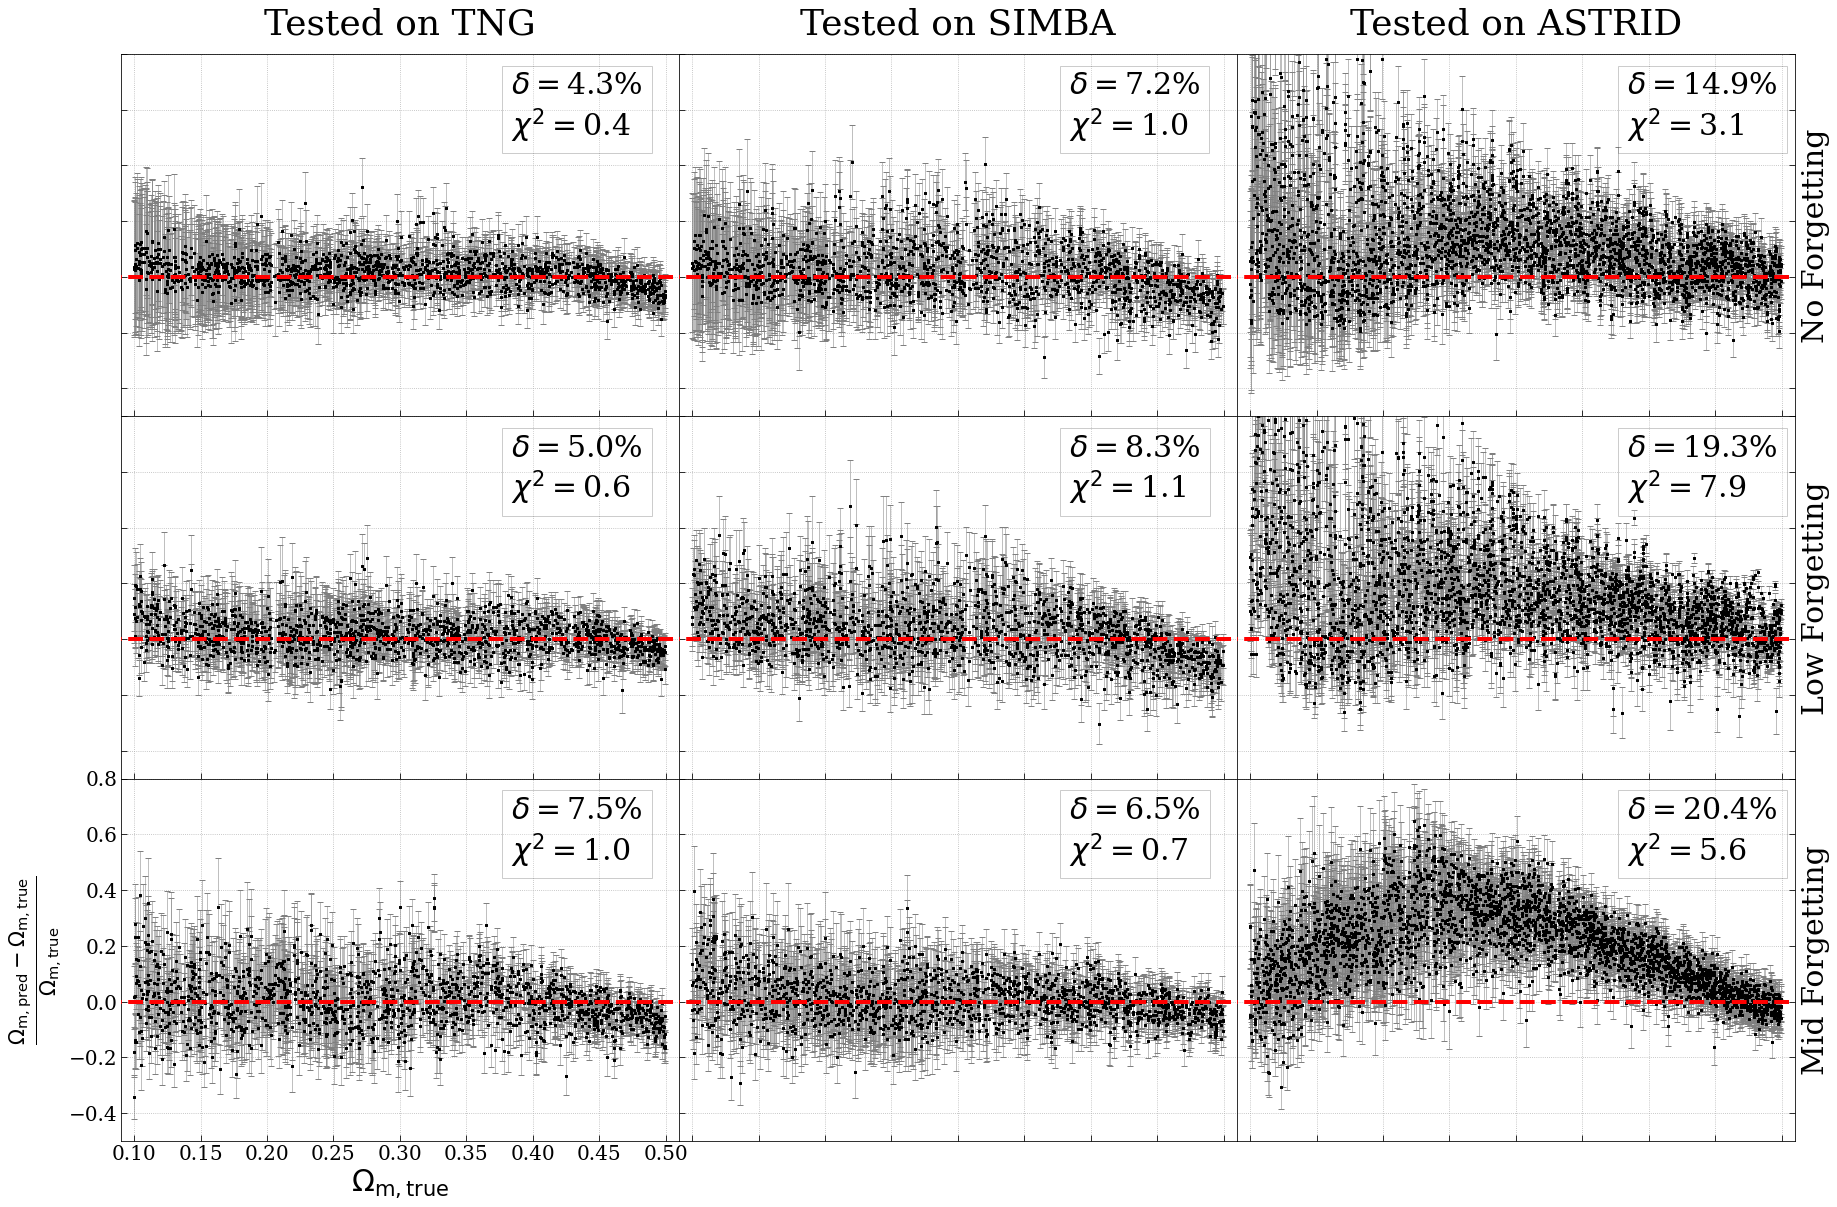

In [21]:
plt.rcParams['font.size'] = 30
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['font.family']='serif'
X, Y = 3,3
fig, axes = pu.generateAxesForMultiplePlots(shape=(X,Y),figsize=(30,20),
                                      hspace=0.00,wspace=0.00)
#pu.remove_inner_axes(axes,(X,Y))
par = 0 # sigma_8
ideal1 = np.linspace(0.0,0.6,3)

index = np.arange(15000)
np.random.shuffle(index)
index = index[:3000]
data = [data_zero, data_mid, data_high]
ast  = [ast_zero, ast_mid, ast_high]
for i in range(X):
    for j in range(Y):
        if (i < 2):
            y_true = data[j][0][i][:,par]
            y_mean = data[j][1][i][:,par]
            y_std  = data[j][2][i][:,par]
        elif (i == 2):
            y_true = ast[j][0][index,par]
            y_mean = ast[j][1][0][index,par]
            y_std  = ast[j][1][1][index,par]
        y_res     = (y_mean-y_true)/y_true
        y_res_std = y_std/y_true
        
        axes[i,j].errorbar(y_true,y_res,y_res_std,linestyle="None",ecolor="grey", capsize=3,lw=0.5)#, s=1)
        axes[i,j].scatter(y_true,y_res,s=4,c='k',zorder=20,marker='s')
        axes[i,j].plot(ideal1,[0,0,0],"r",ls='--',lw=4,zorder=40)
        
        rel_err = np.mean(np.abs(y_res))*100
        xi2     = np.mean((y_mean-y_true)**2/y_std**2)
        props = dict(boxstyle='square', facecolor='white', alpha=0.2)
        text=\
f"""$\\delta=${rel_err:.1f}%
$\\chi^2=${xi2:.1f}"""
        axes[i,j].text(.7, .95, text,
         ha='left', va='top', transform=axes[i,j].transAxes,
         bbox=props)
        
        axes[i,j].tick_params(direction='in', axis='both', which='both', length=6)
        axes[i,j].grid(ls=':')
        if j == Y-1 and i == 0:
            axes[i,j].set_xlabel(r"$\Omega_\mathrm{m, true}$")
            axes[i,j].set_ylabel(r"$\frac{\Omega_\mathrm{m, pred}-\Omega_\mathrm{m, true}}{\Omega_\mathrm{m, true}}$")
        else:
            axes[i,j].set_xticklabels([])
            axes[i,j].set_yticklabels([])
        axes[i,j].set_xlim(0.09,0.51)
        axes[i,j].set_ylim(-.5,.8)
        
axes[0,0].set_title('Tested on TNG',pad=20)
axes[1,0].set_title('Tested on SIMBA',pad=20)
axes[2,0].set_title('Tested on ASTRID',pad=20)
labels = ['No Forgetting', 'Low Forgetting', 'Mid Forgetting', 'High Forgetting']
for i in range(Y):
    axes[X-1,i].yaxis.set_label_position("right")
    axes[X-1,i].yaxis.tick_right()
    axes[X-1,i].set_ylabel(labels[i])
plt.savefig('paper_plot/TNG_SIMBA_T_performance_om.png',dpi=200, bbox_inches='tight')

#### Plot for $\sigma_8$

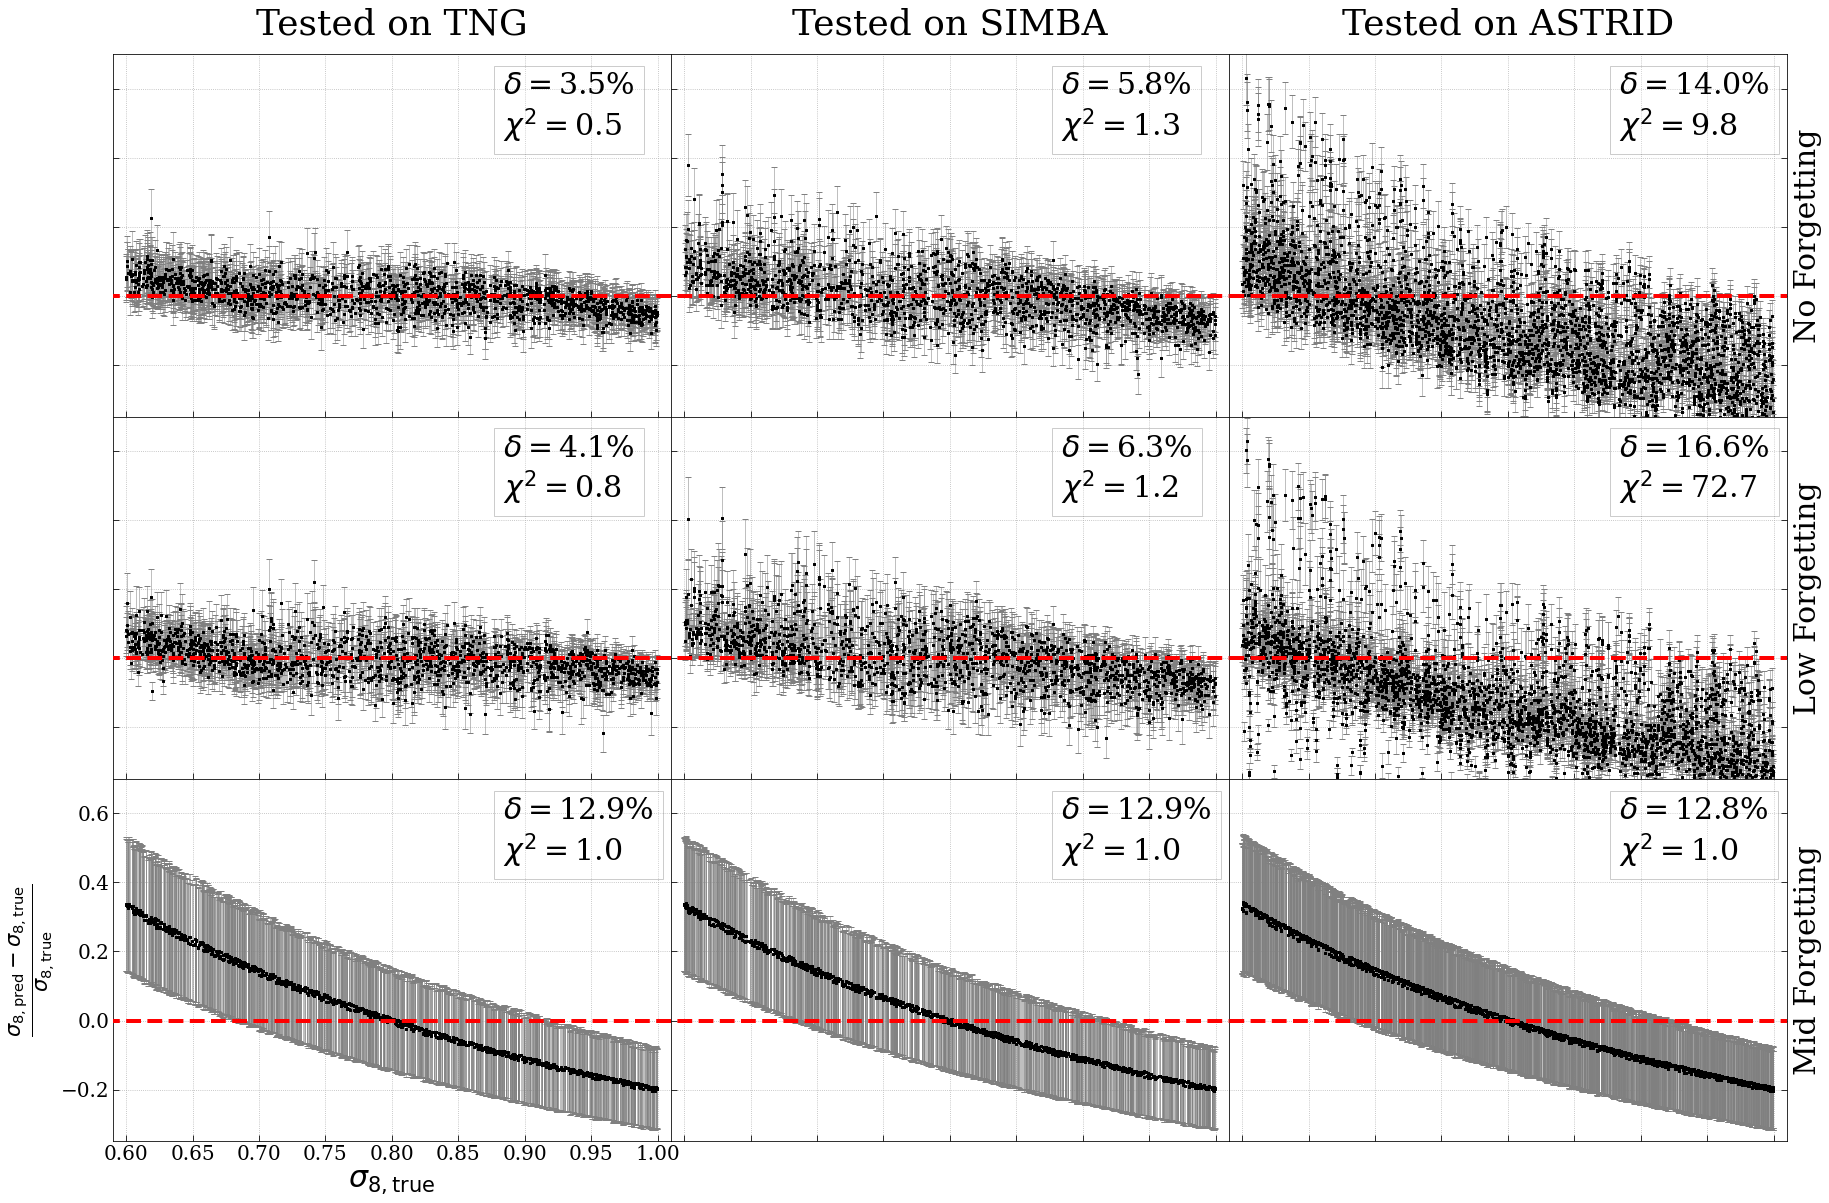

In [22]:
plt.rcParams['font.size'] = 30
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['font.family']='serif'
X, Y = 3,3
fig, axes = pu.generateAxesForMultiplePlots(shape=(X,Y),figsize=(30,20),
                                      hspace=0.00,wspace=0.00)
#pu.remove_inner_axes(axes,(X,Y))
par = 1 # sigma_8
ideal1 = np.linspace(0.0,2,3)

index = np.arange(15000)
np.random.shuffle(index)
index = index[:3000]
data = [data_zero, data_mid, data_high]
ast  = [ast_zero, ast_mid, ast_high]
for i in range(X):
    for j in range(Y):
        if (i < 2):
            y_true = data[j][0][i][:,par]
            y_mean = data[j][1][i][:,par]
            y_std  = data[j][2][i][:,par]
        elif (i == 2):
            y_true = ast[j][0][index,par]
            y_mean = ast[j][1][0][index,par]
            y_std  = ast[j][1][1][index,par]
        y_res     = (y_mean-y_true)/y_true
        y_res_std = y_std/y_true
        
        axes[i,j].errorbar(y_true,y_res,y_res_std,linestyle="None",ecolor="grey", capsize=3,lw=0.5)#, s=1)
        axes[i,j].scatter(y_true,y_res,s=4,c='k',zorder=20,marker='s')
        axes[i,j].plot(ideal1,[0,0,0],"r",ls='--',lw=4,zorder=40)
        
        rel_err = np.mean(np.abs(y_res))*100
        xi2     = np.mean((y_mean-y_true)**2/y_std**2)
        props = dict(boxstyle='square', facecolor='white', alpha=0.2)
        text=\
f"""$\\delta=${rel_err:.1f}%
$\\chi^2=${xi2:.1f}"""
        axes[i,j].text(.7, .95, text,
         ha='left', va='top', transform=axes[i,j].transAxes,
         bbox=props)
        
        axes[i,j].tick_params(direction='in', axis='both', which='both', length=6)
        axes[i,j].grid(ls=':')
        if j == Y-1 and i == 0:
            axes[i,j].set_xlabel(r"$\sigma_\mathrm{8, true}$")
            axes[i,j].set_ylabel(r"$\frac{\sigma_\mathrm{8, pred}-\sigma_\mathrm{8, true}}{\sigma_\mathrm{8, true}}$")
        else:
            axes[i,j].set_xticklabels([])
            axes[i,j].set_yticklabels([])
        axes[i,j].set_xlim(0.59,1.01)
        axes[i,j].set_ylim(-.35,.7)
        
axes[0,0].set_title('Tested on TNG',pad=20)
axes[1,0].set_title('Tested on SIMBA',pad=20)
axes[2,0].set_title('Tested on ASTRID',pad=20)
labels = ['No Forgetting', 'Low Forgetting', 'Mid Forgetting', 'High Forgetting']
for i in range(Y):
    axes[X-1,i].yaxis.set_label_position("right")
    axes[X-1,i].yaxis.tick_right()
    axes[X-1,i].set_ylabel(labels[i])
plt.savefig('paper_plot/TNG_SIMBA_T_performance_sig.png',dpi=200, bbox_inches='tight')